In [7]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\devag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data = pd.read_csv(r"C:\Users\devag\Downloads\train.csv")

In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
list(data.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [12]:
for i in data.columns:
    if data[i].dtype != 'object':
        correlation = data[i].corr(data['SalePrice'])
        print(i, ":", correlation)

Id : -0.021916719443431102
MSSubClass : -0.08428413512659516
LotFrontage : 0.3517990965706779
LotArea : 0.26384335387140556
OverallQual : 0.7909816005838048
OverallCond : -0.07785589404867799
YearBuilt : 0.5228973328794969
YearRemodAdd : 0.5071009671113861
MasVnrArea : 0.4774930470957154
BsmtFinSF1 : 0.3864198062421531
BsmtFinSF2 : -0.011378121450215134
BsmtUnfSF : 0.2144791055469689
TotalBsmtSF : 0.6135805515591954
1stFlrSF : 0.6058521846919146
2ndFlrSF : 0.31933380283206775
LowQualFinSF : -0.02560613000067954
GrLivArea : 0.7086244776126521
BsmtFullBath : 0.22712223313149424
BsmtHalfBath : -0.01684415429735901
FullBath : 0.5606637627484461
HalfBath : 0.2841076755947824
BedroomAbvGr : 0.16821315430073996
KitchenAbvGr : -0.13590737084214116
TotRmsAbvGrd : 0.5337231555820281
Fireplaces : 0.4669288367515277
GarageYrBlt : 0.48636167748786097
GarageCars : 0.6404091972583521
GarageArea : 0.6234314389183615
WoodDeckSF : 0.32441344456813
OpenPorchSF : 0.3158562271160554
EnclosedPorch : -0.1285

In [13]:
# Here we take the GrLivArea as X, SalePrice as Y
X = data[['GrLivArea']]
Y = data['SalePrice']

In [14]:
# Spliting to train and test 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()

model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
Y_pred = model.predict(X_test)

In [17]:
results = pd.DataFrame({"Actual": Y_test[:10], "Predicted": Y_pred[:10]})
print(results)

      Actual      Predicted
892   154500  134357.956280
1105  325000  293625.798437
413   115000  130258.397924
522   159000  195441.375795
1036  315500  190931.861602
614    75500   89467.792275
218   311500  225163.173881
1160  146000  174123.672340
649    84500   89467.792275
887   135500  167666.867928


In [18]:
print("Slope (coefficient):", model.coef_)
print("Intercept:", model.intercept_)

Slope (coefficient): [102.48895892]
Intercept: 24899.74815733818


In [19]:
print("R2 Score :",r2_score(Y_test,Y_pred))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 Score : 0.5542632452871117
Root Mean Squared Error : 58471.75652552955


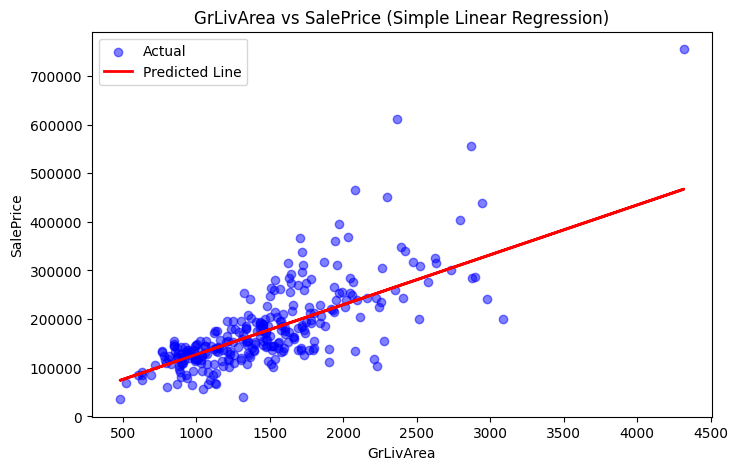

In [20]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.figure(figsize=(8,5))
plt.scatter(X_test, Y_test, color="blue", alpha=0.5, label="Actual")

# Regression line (predictions)
plt.plot(X_test, Y_pred, color="red", linewidth=2, label="Predicted Line")

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs SalePrice (Simple Linear Regression)")
plt.legend()
plt.show()


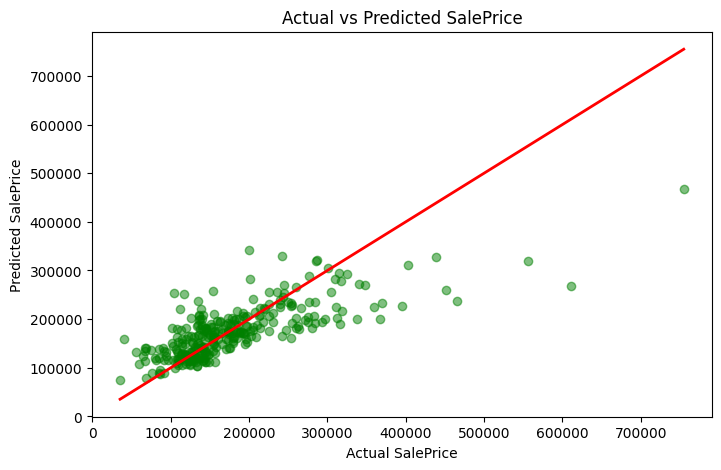

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(Y_test, Y_pred, alpha=0.5, color="green")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", linewidth=2)  # diagonal line
plt.show()


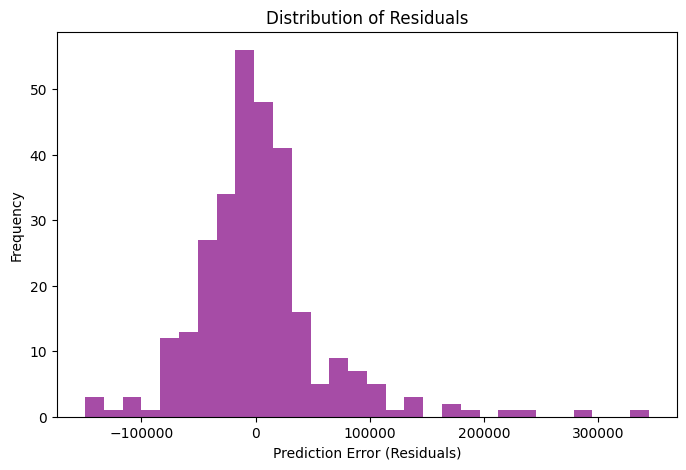

In [22]:
errors = Y_test - Y_pred

plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, color="purple", alpha=0.7)
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()
